In [1]:
#Import Spotipy packages
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
from pprint import pprint
from collections import Counter

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Import Spotipy packages
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

In [4]:
from Spotify_keys import CLIENT_ID, CLIENT_SECRET, CLIENT_REDIRECT

In [5]:
#More Authorization flow, using variables to get access tokens to allow data extraction from Spotify API
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False

In [6]:
starting_points = ['My Chemical Romance', 'Thursday', 'Circa Survive']

In [7]:
list_of_artists = []
list_of_ids = []
list_of_uris = []

for artist_name in starting_points:
    list_of_artists.append(artist_name)
    
    artist_search = sp.search(artist_name)
    artist_id = artist_search['tracks']['items'][0]['artists'][0]['id']
    list_of_ids.append(artist_id)

    related_artist = sp.artist_related_artists(artist_id)
    
    RA = related_artist['artists']
    for i in range(len(RA)):
        if i not in list_of_artists:
            list_of_artists.append(RA[i]['name'])
            list_of_ids.append(RA[i]['id'])

In [8]:
len(list_of_artists)

63

In [9]:
for artist_name in list_of_artists[0:29]:
    
    artist_search = sp.search(artist_name)
    artist_id = artist_search['tracks']['items'][0]['artists'][0]['id']
    
    related_artist = sp.artist_related_artists(artist_id)
    
    RA = related_artist['artists']
    for i in range(len(RA)):
        if RA[i]['name'] not in list_of_artists:
            list_of_artists.append(RA[i]['name'])
            list_of_ids.append(RA[i]['id'])

In [10]:
for artist_name in list_of_artists[30:59]:
    
    artist_search = sp.search(artist_name)
    artist_id = artist_search['tracks']['items'][0]['artists'][0]['id']
    
    related_artist = sp.artist_related_artists(artist_id)
    
    RA = related_artist['artists']
    for i in range(len(RA)):
        if RA[i]['name'] not in list_of_artists:
            list_of_artists.append(RA[i]['name'])
            list_of_ids.append(RA[i]['id'])

In [34]:
for artist_name in list_of_artists[60:62]:
    
    artist_search = sp.search(artist_name)
    artist_id = artist_search['tracks']['items'][0]['artists'][0]['id']
    
    related_artist = sp.artist_related_artists(artist_id)
    
    RA = related_artist['artists']
    for i in range(len(RA)):
        if RA[i]['name'] not in list_of_artists:
            list_of_artists.append(RA[i]['name'])
            list_of_ids.append(RA[i]['id'])

In [17]:
len(list_of_artists)

466

In [15]:
track_artist_names = [[]]
track_artist_names_ids = [[]]
track_artist_names_ids_uris = [[]]

track_ids = []
track_uris = []

for artist_id in list_of_ids:
    artist_top_tracks = sp.artist_top_tracks(artist_id)
    
    top_tracks = artist_top_tracks['tracks']

    for ind, i in enumerate(range(len(top_tracks))):
        track_artist_names.append([top_tracks[i]['artists'][0]['name'], top_tracks[i]['name']])
        track_artist_names_ids_uris.append([top_tracks[i]['artists'][0]['name'],
                                       top_tracks[i]['name'],
                                       top_tracks[i]['id'],
                                       top_tracks[i]['uri']])      

In [18]:
len(track_artist_names_ids_uris)

4601

In [19]:
songs_df = pd.DataFrame(track_artist_names_ids_uris, columns = ['Artist', 'Song', 'ID', 'URI'])
songs_df = songs_df.drop([0])

In [20]:
songs_df.head(10)

,Artist,Song,ID,URI
1,My Chemical Romance,Teenagers,7j31rVgGX9Q2blT92VBEA0,spotify:track:7j31rVgGX9Q2blT92VBEA0
2,My Chemical Romance,Welcome to the Black Parade,5wQnmLuC1W7ATsArWACrgW,spotify:track:5wQnmLuC1W7ATsArWACrgW
3,My Chemical Romance,I'm Not Okay (I Promise),7lRlq939cDG4SzWOF4VAnd,spotify:track:7lRlq939cDG4SzWOF4VAnd
4,My Chemical Romance,Helena,5dTHtzHFPyi8TlTtzoz1J9,spotify:track:5dTHtzHFPyi8TlTtzoz1J9
5,My Chemical Romance,Famous Last Words,2d6m2F4I7wCuAKtSsdhh83,spotify:track:2d6m2F4I7wCuAKtSsdhh83
6,My Chemical Romance,I Don't Love You,4RAOI1etsgbh5NP3T5R8rN,spotify:track:4RAOI1etsgbh5NP3T5R8rN
7,My Chemical Romance,Na Na Na (Na Na Na Na Na Na Na Na Na),5BB0Jzw60KyfSTyjJqtely,spotify:track:5BB0Jzw60KyfSTyjJqtely
8,My Chemical Romance,Dead!,0uukw2CgEIApv4IWAjXrBC,spotify:track:0uukw2CgEIApv4IWAjXrBC
9,My Chemical Romance,Mama,0Zh3tKIphLOvQux4dA6PFZ,spotify:track:0Zh3tKIphLOvQux4dA6PFZ
10,My Chemical Romance,The Ghost of You,1yKAqZoi8xWGLCf5vajroL,spotify:track:1yKAqZoi8xWGLCf5vajroL


In [32]:
songs_df.tail(5)

,Artist,Song,ID,URI
4596,Sufferer,Drag,4kRNHgkUx5YhkTwpwuvrpS,spotify:track:4kRNHgkUx5YhkTwpwuvrpS
4597,Sufferer,Always,52Wx2Z80tUHMXF0Yiwe4FZ,spotify:track:52Wx2Z80tUHMXF0Yiwe4FZ
4598,Push over,Transitioning Seamlessly,1kwDnqVI0CV5r4ZwDqoCkD,spotify:track:1kwDnqVI0CV5r4ZwDqoCkD
4599,Push over,This Lonely Love,1vrBoWrKSWXD3TqgJ5nagz,spotify:track:1vrBoWrKSWXD3TqgJ5nagz
4600,Push over,Run the Tapes,7eGI3xOW4GlJ5eI1UKWh01,spotify:track:7eGI3xOW4GlJ5eI1UKWh01


In [37]:
list_of_ids

1       7j31rVgGX9Q2blT92VBEA0
2       5wQnmLuC1W7ATsArWACrgW
3       7lRlq939cDG4SzWOF4VAnd
4       5dTHtzHFPyi8TlTtzoz1J9
5       2d6m2F4I7wCuAKtSsdhh83
                 ...          
4596    4kRNHgkUx5YhkTwpwuvrpS
4597    52Wx2Z80tUHMXF0Yiwe4FZ
4598    1kwDnqVI0CV5r4ZwDqoCkD
4599    1vrBoWrKSWXD3TqgJ5nagz
4600    7eGI3xOW4GlJ5eI1UKWh01
Name: ID, Length: 4600, dtype: object

In [21]:
list_of_ids = songs_df['ID']

In [22]:
def get_audio_features(song_ids, list_for_audio_features):
    start = 0
    end = 0
    audio_features =[]
    
    while end-1 <= len(song_ids): #quit when we get past the end of our list
        end += 100 #update the end of our slice
        if end <= len(song_ids): #split into if else statement to slice correctly
            try:
                songs_temp = sp.audio_features(song_ids[start:end])    # Added in user_id
            except requests.exceptions.RetryError as retry_error: 
                if retry_error.code == -1: #if we get a rate limit error, go to sleep
                    print('sleeping, 5 seconds')
                    time.sleep(5)
        else:
            try:
                songs_temp = sp.audio_features(song_ids[start:end])
            except requests.exceptions.RetryError as retry_error: 
                if retry_error.code == -1: #if we get a rate limit error, go to sleep
                    print('sleeping, 5 seconds')
                    time.sleep(5)
        audio_features.extend(songs_temp)
        start = end
    list_for_audio_features.extend(audio_features)

In [23]:
audio_features = []

get_audio_features(list_of_ids, audio_features)

In [24]:
for ind, i in enumerate(audio_features):
    if audio_features[ind] is None:
        print(ind)

4600


In [ ]:
del audio_features(4600)

In [39]:
features_df = pd.DataFrame(audio_features)
features_df.head(10)

AttributeError: 'NoneType' object has no attribute 'keys'

In [474]:
len(features_df)

4609

In [ ]:
extracted_uris = songs_df['URI'].tolist()

In [ ]:
pops = []

for uri in extracted_uris:
    track = sp.track(uri)

    pop = track['popularity']
    pops.append(pop)

In [14]:
features_df['popularity'] = pops

NameError: name 'pops' is not defined

In [478]:
features_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.463,0.857,4,-3.063,1,0.0632,0.050600,0.000000,0.1840,0.8560,111.647,audio_features,7j31rVgGX9Q2blT92VBEA0,spotify:track:7j31rVgGX9Q2blT92VBEA0,https://api.spotify.com/v1/tracks/7j31rVgGX9Q2...,https://api.spotify.com/v1/audio-analysis/7j31...,161920,4,85
1,0.217,0.905,2,-4.103,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,audio_features,5wQnmLuC1W7ATsArWACrgW,spotify:track:5wQnmLuC1W7ATsArWACrgW,https://api.spotify.com/v1/tracks/5wQnmLuC1W7A...,https://api.spotify.com/v1/audio-analysis/5wQn...,311107,4,81
2,0.210,0.940,9,-3.427,1,0.1230,0.006020,0.000000,0.2690,0.2550,179.722,audio_features,7lRlq939cDG4SzWOF4VAnd,spotify:track:7lRlq939cDG4SzWOF4VAnd,https://api.spotify.com/v1/tracks/7lRlq939cDG4...,https://api.spotify.com/v1/audio-analysis/7lRl...,186480,4,78
3,0.356,0.960,4,-3.487,1,0.1040,0.014200,0.000000,0.2090,0.0857,125.921,audio_features,5dTHtzHFPyi8TlTtzoz1J9,spotify:track:5dTHtzHFPyi8TlTtzoz1J9,https://api.spotify.com/v1/tracks/5dTHtzHFPyi8...,https://api.spotify.com/v1/audio-analysis/5dTH...,204733,4,77
4,0.467,0.883,2,-3.679,0,0.1060,0.000321,0.000152,0.1250,0.3090,122.252,audio_features,2d6m2F4I7wCuAKtSsdhh83,spotify:track:2d6m2F4I7wCuAKtSsdhh83,https://api.spotify.com/v1/tracks/2d6m2F4I7wCu...,https://api.spotify.com/v1/audio-analysis/2d6m...,299227,4,76
5,0.289,0.796,0,-4.220,1,0.0494,0.008370,0.000026,0.2020,0.3300,169.835,audio_features,4RAOI1etsgbh5NP3T5R8rN,spotify:track:4RAOI1etsgbh5NP3T5R8rN,https://api.spotify.com/v1/tracks/4RAOI1etsgbh...,https://api.spotify.com/v1/audio-analysis/4RAO...,238680,4,74
6,0.411,0.986,8,-2.522,0,0.0583,0.000264,0.001480,0.3710,0.6490,165.981,audio_features,5BB0Jzw60KyfSTyjJqtely,spotify:track:5BB0Jzw60KyfSTyjJqtely,https://api.spotify.com/v1/tracks/5BB0Jzw60Kyf...,https://api.spotify.com/v1/audio-analysis/5BB0...,205960,4,73
7,0.481,0.973,7,-1.945,1,0.0542,0.003700,0.000877,0.3250,0.3620,99.331,audio_features,0uukw2CgEIApv4IWAjXrBC,spotify:track:0uukw2CgEIApv4IWAjXrBC,https://api.spotify.com/v1/tracks/0uukw2CgEIAp...,https://api.spotify.com/v1/audio-analysis/0uuk...,195520,4,72
8,0.236,0.799,4,-5.167,0,0.0939,0.013600,0.000000,0.0948,0.3030,208.951,audio_features,0Zh3tKIphLOvQux4dA6PFZ,spotify:track:0Zh3tKIphLOvQux4dA6PFZ,https://api.spotify.com/v1/tracks/0Zh3tKIphLOv...,https://api.spotify.com/v1/audio-analysis/0Zh3...,279027,4,71
9,0.202,0.886,11,-3.805,0,0.0816,0.028600,0.000000,0.6430,0.1920,145.781,audio_features,1yKAqZoi8xWGLCf5vajroL,spotify:track:1yKAqZoi8xWGLCf5vajroL,https://api.spotify.com/v1/tracks/1yKAqZoi8xWG...,https://api.spotify.com/v1/audio-analysis/1yKA...,194253,4,71


In [140]:
df = df.rename(columns = {"Track ID":"id"})

In [141]:
main_df = pd.merge(df, features_df, on = 'id')
main_df

,Artist,Track Name,id,Track URI,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,My Chemical Romance,Teenagers,7j31rVgGX9Q2blT92VBEA0,spotify:track:7j31rVgGX9Q2blT92VBEA0,0.463,0.857,4,-3.063,1,0.0632,...,0.1840,0.8560,111.647,audio_features,spotify:track:7j31rVgGX9Q2blT92VBEA0,https://api.spotify.com/v1/tracks/7j31rVgGX9Q2...,https://api.spotify.com/v1/audio-analysis/7j31...,161920,4,85
1,My Chemical Romance,Welcome to the Black Parade,5wQnmLuC1W7ATsArWACrgW,spotify:track:5wQnmLuC1W7ATsArWACrgW,0.217,0.905,2,-4.103,1,0.0752,...,0.2220,0.2360,96.950,audio_features,spotify:track:5wQnmLuC1W7ATsArWACrgW,https://api.spotify.com/v1/tracks/5wQnmLuC1W7A...,https://api.spotify.com/v1/audio-analysis/5wQn...,311107,4,81
2,My Chemical Romance,I'm Not Okay (I Promise),7lRlq939cDG4SzWOF4VAnd,spotify:track:7lRlq939cDG4SzWOF4VAnd,0.210,0.940,9,-3.427,1,0.1230,...,0.2690,0.2550,179.722,audio_features,spotify:track:7lRlq939cDG4SzWOF4VAnd,https://api.spotify.com/v1/tracks/7lRlq939cDG4...,https://api.spotify.com/v1/audio-analysis/7lRl...,186480,4,78
3,My Chemical Romance,Helena,5dTHtzHFPyi8TlTtzoz1J9,spotify:track:5dTHtzHFPyi8TlTtzoz1J9,0.356,0.960,4,-3.487,1,0.1040,...,0.2090,0.0857,125.921,audio_features,spotify:track:5dTHtzHFPyi8TlTtzoz1J9,https://api.spotify.com/v1/tracks/5dTHtzHFPyi8...,https://api.spotify.com/v1/audio-analysis/5dTH...,204733,4,77
4,My Chemical Romance,Famous Last Words,2d6m2F4I7wCuAKtSsdhh83,spotify:track:2d6m2F4I7wCuAKtSsdhh83,0.467,0.883,2,-3.679,0,0.1060,...,0.1250,0.3090,122.252,audio_features,spotify:track:2d6m2F4I7wCuAKtSsdhh83,https://api.spotify.com/v1/tracks/2d6m2F4I7wCu...,https://api.spotify.com/v1/audio-analysis/2d6m...,299227,4,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,Inhale Exhale,I Needed A Space Ship (Instead I Got Problems),4ha8azWkYeBls6BHfCQufl,spotify:track:4ha8azWkYeBls6BHfCQufl,0.455,0.956,7,-4.080,1,0.0711,...,0.2610,0.1540,93.964,audio_features,spotify:track:4ha8azWkYeBls6BHfCQufl,https://api.spotify.com/v1/tracks/4ha8azWkYeBl...,https://api.spotify.com/v1/audio-analysis/4ha8...,214440,4,16
4385,Inhale Exhale,Condemned,0l4M1O2Efj8EYvTqPU0Q3p,spotify:track:0l4M1O2Efj8EYvTqPU0Q3p,0.408,0.945,5,-3.592,0,0.0789,...,0.3190,0.3660,144.881,audio_features,spotify:track:0l4M1O2Efj8EYvTqPU0Q3p,https://api.spotify.com/v1/tracks/0l4M1O2Efj8E...,https://api.spotify.com/v1/audio-analysis/0l4M...,230613,4,14
4386,Inhale Exhale,Frail Dreams And Rude Awakenings,2K2gpexdpIAoLqGDT7Q6dl,spotify:track:2K2gpexdpIAoLqGDT7Q6dl,0.389,0.916,5,-5.698,0,0.0807,...,0.3660,0.4310,90.033,audio_features,spotify:track:2K2gpexdpIAoLqGDT7Q6dl,https://api.spotify.com/v1/tracks/2K2gpexdpIAo...,https://api.spotify.com/v1/audio-analysis/2K2g...,191040,4,14
4387,Inhale Exhale,The Impatient Will Suffer,0xSPmxAGH0QZXC5GTBmbCs,spotify:track:0xSPmxAGH0QZXC5GTBmbCs,0.281,0.902,10,-4.043,0,0.0654,...,0.3970,0.3480,164.109,audio_features,spotify:track:0xSPmxAGH0QZXC5GTBmbCs,https://api.spotify.com/v1/tracks/0xSPmxAGH0QZ...,https://api.spotify.com/v1/audio-analysis/0xSP...,280760,4,13


In [142]:
main_df = pd.merge(df, features_df, on = 'id')
main_df

,Artist,Track Name,id,Track URI,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,My Chemical Romance,Teenagers,7j31rVgGX9Q2blT92VBEA0,spotify:track:7j31rVgGX9Q2blT92VBEA0,0.463,0.857,4,-3.063,1,0.0632,...,0.1840,0.8560,111.647,audio_features,spotify:track:7j31rVgGX9Q2blT92VBEA0,https://api.spotify.com/v1/tracks/7j31rVgGX9Q2...,https://api.spotify.com/v1/audio-analysis/7j31...,161920,4,85
1,My Chemical Romance,Welcome to the Black Parade,5wQnmLuC1W7ATsArWACrgW,spotify:track:5wQnmLuC1W7ATsArWACrgW,0.217,0.905,2,-4.103,1,0.0752,...,0.2220,0.2360,96.950,audio_features,spotify:track:5wQnmLuC1W7ATsArWACrgW,https://api.spotify.com/v1/tracks/5wQnmLuC1W7A...,https://api.spotify.com/v1/audio-analysis/5wQn...,311107,4,81
2,My Chemical Romance,I'm Not Okay (I Promise),7lRlq939cDG4SzWOF4VAnd,spotify:track:7lRlq939cDG4SzWOF4VAnd,0.210,0.940,9,-3.427,1,0.1230,...,0.2690,0.2550,179.722,audio_features,spotify:track:7lRlq939cDG4SzWOF4VAnd,https://api.spotify.com/v1/tracks/7lRlq939cDG4...,https://api.spotify.com/v1/audio-analysis/7lRl...,186480,4,78
3,My Chemical Romance,Helena,5dTHtzHFPyi8TlTtzoz1J9,spotify:track:5dTHtzHFPyi8TlTtzoz1J9,0.356,0.960,4,-3.487,1,0.1040,...,0.2090,0.0857,125.921,audio_features,spotify:track:5dTHtzHFPyi8TlTtzoz1J9,https://api.spotify.com/v1/tracks/5dTHtzHFPyi8...,https://api.spotify.com/v1/audio-analysis/5dTH...,204733,4,77
4,My Chemical Romance,Famous Last Words,2d6m2F4I7wCuAKtSsdhh83,spotify:track:2d6m2F4I7wCuAKtSsdhh83,0.467,0.883,2,-3.679,0,0.1060,...,0.1250,0.3090,122.252,audio_features,spotify:track:2d6m2F4I7wCuAKtSsdhh83,https://api.spotify.com/v1/tracks/2d6m2F4I7wCu...,https://api.spotify.com/v1/audio-analysis/2d6m...,299227,4,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4384,Inhale Exhale,I Needed A Space Ship (Instead I Got Problems),4ha8azWkYeBls6BHfCQufl,spotify:track:4ha8azWkYeBls6BHfCQufl,0.455,0.956,7,-4.080,1,0.0711,...,0.2610,0.1540,93.964,audio_features,spotify:track:4ha8azWkYeBls6BHfCQufl,https://api.spotify.com/v1/tracks/4ha8azWkYeBl...,https://api.spotify.com/v1/audio-analysis/4ha8...,214440,4,16
4385,Inhale Exhale,Condemned,0l4M1O2Efj8EYvTqPU0Q3p,spotify:track:0l4M1O2Efj8EYvTqPU0Q3p,0.408,0.945,5,-3.592,0,0.0789,...,0.3190,0.3660,144.881,audio_features,spotify:track:0l4M1O2Efj8EYvTqPU0Q3p,https://api.spotify.com/v1/tracks/0l4M1O2Efj8E...,https://api.spotify.com/v1/audio-analysis/0l4M...,230613,4,14
4386,Inhale Exhale,Frail Dreams And Rude Awakenings,2K2gpexdpIAoLqGDT7Q6dl,spotify:track:2K2gpexdpIAoLqGDT7Q6dl,0.389,0.916,5,-5.698,0,0.0807,...,0.3660,0.4310,90.033,audio_features,spotify:track:2K2gpexdpIAoLqGDT7Q6dl,https://api.spotify.com/v1/tracks/2K2gpexdpIAo...,https://api.spotify.com/v1/audio-analysis/2K2g...,191040,4,14
4387,Inhale Exhale,The Impatient Will Suffer,0xSPmxAGH0QZXC5GTBmbCs,spotify:track:0xSPmxAGH0QZXC5GTBmbCs,0.281,0.902,10,-4.043,0,0.0654,...,0.3970,0.3480,164.109,audio_features,spotify:track:0xSPmxAGH0QZXC5GTBmbCs,https://api.spotify.com/v1/tracks/0xSPmxAGH0QZ...,https://api.spotify.com/v1/audio-analysis/0xSP...,280760,4,13


In [143]:
print(main_df.columns)

Index(['Artist', 'Track Name', 'id', 'Track URI', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature',
       'popularity'],
      dtype='object')


In [144]:
main_df = main_df.drop(columns=['Track URI', 'uri', 'track_href', 'analysis_url', 'type'])

In [295]:
main_df.head(10)

,Artist,Track Name,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
0,My Chemical Romance,Teenagers,7j31rVgGX9Q2blT92VBEA0,0.463,0.857,4,-3.063,1,0.0632,0.050600,0.000000,0.1840,0.8560,111.647,161920,4,85
1,My Chemical Romance,Welcome to the Black Parade,5wQnmLuC1W7ATsArWACrgW,0.217,0.905,2,-4.103,1,0.0752,0.000289,0.000110,0.2220,0.2360,96.950,311107,4,81
2,My Chemical Romance,I'm Not Okay (I Promise),7lRlq939cDG4SzWOF4VAnd,0.210,0.940,9,-3.427,1,0.1230,0.006020,0.000000,0.2690,0.2550,179.722,186480,4,78
3,My Chemical Romance,Helena,5dTHtzHFPyi8TlTtzoz1J9,0.356,0.960,4,-3.487,1,0.1040,0.014200,0.000000,0.2090,0.0857,125.921,204733,4,77
4,My Chemical Romance,Famous Last Words,2d6m2F4I7wCuAKtSsdhh83,0.467,0.883,2,-3.679,0,0.1060,0.000321,0.000152,0.1250,0.3090,122.252,299227,4,75
5,My Chemical Romance,I Don't Love You,4RAOI1etsgbh5NP3T5R8rN,0.289,0.796,0,-4.220,1,0.0494,0.008370,0.000026,0.2020,0.3300,169.835,238680,4,74
6,My Chemical Romance,Na Na Na (Na Na Na Na Na Na Na Na Na),5BB0Jzw60KyfSTyjJqtely,0.411,0.986,8,-2.522,0,0.0583,0.000264,0.001480,0.3710,0.6490,165.981,205960,4,72
7,My Chemical Romance,Dead!,0uukw2CgEIApv4IWAjXrBC,0.481,0.973,7,-1.945,1,0.0542,0.003700,0.000877,0.3250,0.3620,99.331,195520,4,71
8,My Chemical Romance,Mama,0Zh3tKIphLOvQux4dA6PFZ,0.236,0.799,4,-5.167,0,0.0939,0.013600,0.000000,0.0948,0.3030,208.951,279027,4,71
9,My Chemical Romance,The Ghost of You,1yKAqZoi8xWGLCf5vajroL,0.202,0.886,11,-3.805,0,0.0816,0.028600,0.000000,0.6430,0.1920,145.781,194253,4,71


In [145]:
main_df.to_csv('related_artist_songs.csv')

## Descriptive Statistics

### Data Dictionary

#Data Dictionary

- Acousticness: Numerical (0 to 1), Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- Danceability: Numerical (0 to 1), danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Duration_ms: Integer (typcially ranging from 200k to 300k), the duration of the track in milliseconds.
- Energy: Numerical (0 to 1), Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- Instrumentalness: Numerical (0 to 1), predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- Key: Categorical, the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C#/Db, 2 = D, and so on. If no key was detected, the value is -1.
- Liveness: Numerical (0 to 1), detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- Loudness: Numerical (Float) (-60 to 0), Overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- Mode: Numerical (Dummy) (0 = Minor, 1 = Major), mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- Speechiness: Numerical (0 to 1), speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- Tempo: Numerical (Float) (typically 50 to 150), Overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: Numerical  (0 to 1), Measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- Time Signature: Categorical (tpyically 4), a notational convention to specify how many beats are in each bar (or measure).
- Popularity: According to Spotify, “popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.”

Source: https://rpubs.com/PeterDola/SpotifyTracks

https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1#:~:text=According%20to%20Spotify%2C%20%E2%80%9Cpopularity%20is,a%20lot%20in%20the%20past.%E2%80%9D

In [305]:
main_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4389.000000,4.389000e+03,4389.000000,4389.000000
mean,0.483338,0.786369,5.244703,-5.749332,0.610162,0.085383,0.114222,0.064022,0.214267,0.416788,130.601985,2.258329e+05,3.905445,44.858054
std,0.157946,0.199611,3.600339,2.542376,0.487769,0.067637,0.221212,0.196906,0.153791,0.208450,30.965253,6.461973e+04,0.379440,15.303021
min,0.092000,0.000020,0.000000,-27.652000,0.000000,0.022500,0.000001,0.000000,0.015100,0.031900,50.846000,3.298700e+04,1.000000,2.000000
25%,0.376000,0.685000,2.000000,-6.849000,0.000000,0.040600,0.000489,0.000000,0.105000,0.252000,105.136000,1.899070e+05,4.000000,34.000000
50%,0.475000,0.861000,5.000000,-5.227000,1.000000,0.062400,0.006770,0.000009,0.154000,0.397000,129.950000,2.156400e+05,4.000000,45.000000
75%,0.578000,0.937000,8.000000,-4.056000,1.000000,0.104000,0.098800,0.001570,0.301000,0.562000,155.032000,2.484670e+05,4.000000,56.000000
max,0.975000,0.999000,11.000000,-0.113000,1.000000,0.935000,0.987000,0.978000,0.970000,0.972000,216.020000,1.003747e+06,5.000000,85.000000


In [306]:
import matplotlib.pyplot as plt

(array([ 32., 148., 396., 662., 814., 801., 780., 497., 197.,  62.]),
 array([ 2. , 10.3, 18.6, 26.9, 35.2, 43.5, 51.8, 60.1, 68.4, 76.7, 85. ]),
 <BarContainer object of 10 artists>)

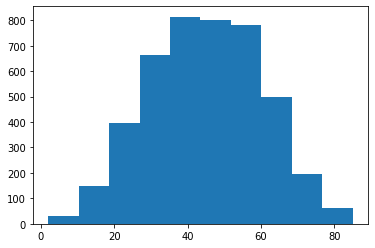

In [307]:
plt.hist(main_df['popularity'])

In [308]:
main_df(nunique())

NameError: name 'nunique' is not defined

## Lyrics Pull

In [215]:
import requests
from bs4 import BeautifulSoup
import os
import re
import numpy as np

In [170]:
from azlyrics.azlyrics import artists, songs, lyrics

In [174]:
wd = lyrics("My Chemical Romance", "Helena")
for line in wd:
    print(line)



Long ago, just like the hearse you die to get in again
We are so far from you
Burning on, just like the match you strike to incinerate
The lives of everyone you know

And what's the worst you take (Worst you take)
From every heart you break? (Heart you break)
And like the blade you stain (Blade you stain)
Well, I've been holding on tonight

What's the worst that I can say?
Things are better if I stay
So long and goodnight
So long, not goodnight

Came a time when every star fall brought you to tears again
We are the very hurt you sold

And what's the worst you take (Worst you take)
From every heart you break? (Heart you break)
And like the blade you stain (Blade you stain)
Well, I've been holding on tonight

What's the worst that I can say?
Things are better if I stay
So long and goodnight
So long and goodnight
Well, if you carry on this way
Things are better if I stay
So long and goodnight
So long and goodnight

Can you hear me?
Are you near me?
Can we pretend to leave, and then
We'l

In [304]:
# Goal is to create a nested dictionary, the inner dictionary containing the song name as the key
# and the song's lyrics as the value. Start by iterating through list of artists.
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
        
unique_artists_songs = unique(zip(list_of_artists,songs))
unique_artists_songs

[('My Chemical Romance', 'Teenagers'),
 ('The Used', 'Welcome to the Black Parade'),
 ('The Red Jumpsuit Apparatus', "I'm Not Okay (I Promise)"),
 ('Yellowcard', 'Helena'),
 ('The All-American Rejects', 'Famous Last Words'),
 ('Hawthorne Heights', "I Don't Love You"),
 ('Good Charlotte', 'Na Na Na (Na Na Na Na Na Na Na Na Na)'),
 ('Frank Iero', 'Dead!'),
 ('All Time Low', 'Mama'),
 ('Escape the Fate', 'The Ghost of You'),
 ('Simple Plan', 'body bag (feat. YUNGBLUD & Bert McCracken of The Used)'),
 ('Senses Fail', 'The Taste of Ink'),
 ('Mayday Parade', 'Pretty Handsome Awkward'),
 ('AFI', 'The Bird and the Worm'),
 ('Fall Out Boy', "All That I've Got"),
 ('Jimmy Eat World', 'Buried Myself Alive'),
 ('Falling In Reverse', 'I Caught Fire'),
 ('Silverstein', 'Blue and Yellow'),
 ('Panic! At The Disco', 'A Box Full of Sharp Objects'),
 ('Pierce The Veil', 'Under Pressure'),
 ('A Day To Remember', 'Face Down'),
 ('Coheed and Cambria', 'Your Guardian Angel'),
 ('The Prize Fighter Inferno', '

In [267]:
lyrics_dict = {'MCR': {'Helena' : ''}}

lyrics_dict['MCR']

{'Helena': {'lyrics': ''}}

In [268]:
L1 = artists
L2 = songs
d = dict(zip(L1,L2))
d

{'My Chemical Romance': 'Under Pressure',
 'Machine Gun Kelly': 'body bag (feat. YUNGBLUD & Bert McCracken of The Used)',
 'The Used': 'A Box Full of Sharp Objects',
 'The Red Jumpsuit Apparatus': 'Justify',
 'Yellowcard': 'Rough Landing, Holly',
 'The All-American Rejects': 'Send Her To Heaven',
 'Hawthorne Heights': 'Constant Dread',
 'Less Gravity': 'Ohio Is For Lovers - Lo-Fi',
 'Good Charlotte': 'Hold On',
 'Frank Iero': "Dear Percocet, I Don't Think We Should See Each Other Anymore.",
 'All Time Low': 'Therapy',
 'Cheat Codes': 'Do It All Over (feat. Marc E. Bassy)',
 'Escape the Fate': 'The Webs We Weave',
 'Simple Plan': 'Where I Belong (feat. We The Kings)',
 'Senses Fail': "You're Cute When You Scream",
 'HARRY WAS HERE': 'Weight of the World',
 'Mayday Parade': 'Three Cheers For Five Years',
 'AFI': 'Dancing Through Sunday',
 'Fall Out Boy': 'The Phoenix',
 'Martin Garrix': 'Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)',
 'Lil Peep': "I've Been Waiting (w/ 

In [194]:
artists = main_df['Artist'].to_list()
songs = main_df['Track Name'].to_list()

['Teenagers',
 'Welcome to the Black Parade',
 "I'm Not Okay (I Promise)",
 'Helena',
 'Famous Last Words',
 "I Don't Love You",
 'Na Na Na (Na Na Na Na Na Na Na Na Na)',
 'Dead!',
 'Mama',
 'The Ghost of You',
 'body bag (feat. YUNGBLUD & Bert McCracken of The Used)',
 'The Taste of Ink',
 'Pretty Handsome Awkward',
 'The Bird and the Worm',
 "All That I've Got",
 'Buried Myself Alive',
 'I Caught Fire',
 'Blue and Yellow',
 'A Box Full of Sharp Objects',
 'Under Pressure',
 'Face Down',
 'Your Guardian Angel',
 'False Pretense',
 'Cat And Mouse',
 'Damn Regret',
 "In Fate's Hands",
 'Waiting',
 'Misery Loves Its Company',
 'Brace Yourself',
 'Justify',
 'Ocean Avenue',
 'Only One',
 'Breathing',
 'Lights And Sounds',
 'Way Away',
 'Light Up The Sky',
 'Everywhere',
 'Empty Apartment',
 'Believe',
 'Rough Landing, Holly',
 'Gives You Hell',
 'Dirty Little Secret',
 'Move Along',
 'Swing, Swing',
 'It Ends Tonight',
 'My Paper Heart',
 'Sweat',
 'I Wanna',
 'The Last Song',
 'Send Her 

In [ ]:
## JOHN CODE USE THIS

import random

data = defaultdict(lambda: defaultdict(lambda: defaultdict(str)))


for artist in artists :
    for song in songs : 
        data[artist][song]['lyrics'] = "this would be lyrics"
        data[artist][song]['tokens'] = "this would be lyrics".split()
        data[artist][song]['speechiness'] = random.random()
         

In [200]:
for artist in artists:

['My Chemical Romance', 'Teenagers']
['My Chemical Romance', 'Welcome to the Black Parade']
['My Chemical Romance', "I'm Not Okay (I Promise)"]
['My Chemical Romance', 'Helena']
['My Chemical Romance', 'Famous Last Words']
['My Chemical Romance', "I Don't Love You"]
['My Chemical Romance', 'Na Na Na (Na Na Na Na Na Na Na Na Na)']
['My Chemical Romance', 'Dead!']
['My Chemical Romance', 'Mama']
['My Chemical Romance', 'The Ghost of You']
['Machine Gun Kelly', 'body bag (feat. YUNGBLUD & Bert McCracken of The Used)']
['The Used', 'The Taste of Ink']
['The Used', 'Pretty Handsome Awkward']
['The Used', 'The Bird and the Worm']
['The Used', "All That I've Got"]
['The Used', 'Buried Myself Alive']
['The Used', 'I Caught Fire']
['The Used', 'Blue and Yellow']
['The Used', 'A Box Full of Sharp Objects']
['My Chemical Romance', 'Under Pressure']
['The Red Jumpsuit Apparatus', 'Face Down']
['The Red Jumpsuit Apparatus', 'Your Guardian Angel']
['The Red Jumpsuit Apparatus', 'False Pretense']
['T

['Sparta', 'Mye']
['Dredg', 'Bug Eyes']
['Dredg', "Same Ol' Road"]
['Dredg', 'Ode To The Sun']
['Dredg', 'Catch Without Arms']
['Dredg', 'Hung Over On A Tuesday']
['Dredg', 'Not That Simple']
['Dredg', 'Sanzen']
['Dredg', 'Sang Real']
['Dredg', 'Jamais Vu']
['Dredg', 'Symbol Song']
['Bosnian Rainbows', 'Turtle Neck']
['Bosnian Rainbows', 'Worthless']
['Bosnian Rainbows', 'Eli']
['Bosnian Rainbows', 'Morning Sickness']
['Bosnian Rainbows', 'Torn Maps']
['Bosnian Rainbows', 'The Eye Fell in Love']
['Bosnian Rainbows', 'Dig Right in Me']
['Bosnian Rainbows', 'I Cry for You']
['Bosnian Rainbows', 'Always On the Run']
['Bosnian Rainbows', 'Red']
['Team Sleep', 'Blvd. Nights']
['Team Sleep', 'Ever (Foreign Flag)']
['Team Sleep', 'Ataraxia']
['Team Sleep', 'Your Skull Is Red']
['Team Sleep', 'Princeton Review']
['Team Sleep', 'Formant - Live']
['Team Sleep', 'Our Ride to the Rectory']
['Team Sleep', 'Ever Since WWI']
['Team Sleep', 'Your Skull Is Red - Live']
['Team Sleep', 'Tomb of Liegia']


In [219]:
artist_array = np.array(artists)
song_array = np.array(songs)

arrays = [artist_array,
         song_array]

index = pd.MultiIndex.from_arrays(arrays, names=('Artist', 'Track Name'))

index[1]


#for artist, song in artist_and_song:
#    lyrics_dict = {artist: {song : ''}} 

('My Chemical Romance', 'Welcome to the Black Parade')

In [240]:
from collections import defaultdict

In [279]:
d = dict(artists_songs)
for artist, song in artists_songs:
    if artist in artists_songs:
        artists_songs[artist].append(song)
d

{'': '',
 'My Chemical Romance': 'Under Pressure',
 'Machine Gun Kelly': 'body bag (feat. YUNGBLUD & Bert McCracken of The Used)',
 'The Used': 'A Box Full of Sharp Objects',
 'The Red Jumpsuit Apparatus': 'Justify',
 'Yellowcard': 'Rough Landing, Holly',
 'The All-American Rejects': 'Send Her To Heaven',
 'Hawthorne Heights': 'Constant Dread',
 'Less Gravity': 'Ohio Is For Lovers - Lo-Fi',
 'Good Charlotte': 'Hold On',
 'Frank Iero': "Dear Percocet, I Don't Think We Should See Each Other Anymore.",
 'All Time Low': 'Therapy',
 'Cheat Codes': 'Do It All Over (feat. Marc E. Bassy)',
 'Escape the Fate': 'The Webs We Weave',
 'Simple Plan': 'Where I Belong (feat. We The Kings)',
 'Senses Fail': "You're Cute When You Scream",
 'HARRY WAS HERE': 'Weight of the World',
 'Mayday Parade': 'Three Cheers For Five Years',
 'AFI': 'Dancing Through Sunday',
 'Fall Out Boy': 'The Phoenix',
 'Martin Garrix': 'Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)',
 'Lil Peep': "I've Been Wai

In [294]:
lyrics_dict = {}
def get_lyrics_dict(artist, song):
    song_list = songs
    lyrics_dict[artist] = {}
    lyrics_dict[artist][song] += {}


for artist, song in artists_

lyrics_dict

KeyError: ''